In [ ]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist # este es data set de las imagenes de numeros 
import matplotlib.pyplot as plt

##Haciendo una red neuronal

In [ ]:
#cargando el set de datos de keras
(train_data, train_labels) , (test_data, test_labels)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
#es la cantidad de imagenes del data set
train_data.shape

(60000, 28, 28)

In [ ]:
#una imagen traducida a una matriz que representa pixeles 
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

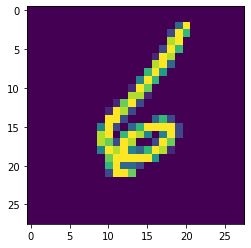

In [ ]:
#la matriz de pixeles traduciada en una imagen
plt.imshow(train_data[1557])

In [ ]:
#viendo el valor
train_labels[1557]

6

In [ ]:
#haciendo la primer red neuronal 
#arquitectura:
#eligiendo el modelo
model = models.Sequential()
#eligiendo las capas
model.add(layers.Dense(512, activation='relu', input_shape= (28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
#compilando la red neuronal
model.compile(
    optimizer='rmsprop',
    loss ='categorical_crossentropy',
    metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = train_data.reshape(60000,28*28)
x_train = x_train.astype('float32')/255

x_test = test_data.reshape(10000,28*28)
x_test = x_test.astype('float32')/255

In [ ]:
x_train[0]#ahora va de numeros del 0 al 1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
train_labels[0]
#es la salida del dato del numero

5

In [ ]:
y_train[0]
#aqui nos marca cual es el numero pero en la posicion

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##Entrenar el modelo

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128)
#se entrena con fit y se itera con epochs; lotes o parches de 128 unidades

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2541 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1027 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0373 - accuracy: 0.9886


In [ ]:
#evaluemos el modelo
model.evaluate(x_test, y_test)
#97% de efectividad?

313/313 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9754


[0.07714671641588211, 0.9753999710083008]